# Advertising Sales Channel Prediction
#  Problem Statement:
*                     Sales Channel Prediction Case Study  

* When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

* The distribution strategy and the channel design have to be right the first time. 
* The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  



# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


#Preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer,power_transform
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error


from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df=pd.read_csv('Advertising.csv')     #Importing data from of csv file
df.head()   #To show first 5 rows of data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Exploratory Data Analysis(EDA)

In [3]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


* The above table shows described details of data given.

In [4]:
df1=df.iloc[:, 1:5]
df1

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


* From above table removed or deleted the unwanted row from the data

# Finding null values

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


 * From above observation there is no null values in the data

In [6]:
df1.shape

(200, 4)

* From above function tells there is 200 rows and 4 columns in the data

In [7]:
df1.isnull().all().sum()

0

# Finding null values using heatmap plot

Text(0.5, 1.0, 'Null values')

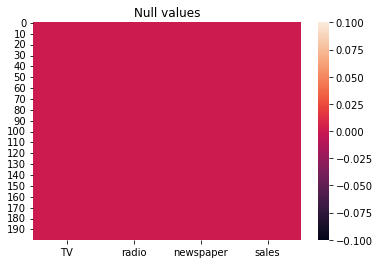

In [8]:
sns.heatmap(df1.isnull())
plt.title('Null values')

* Hece the red color shows there is no null values in the data

In [9]:
df1.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


# Correlation matrix plot

Text(0.5, 1.0, 'Correlation Plot')

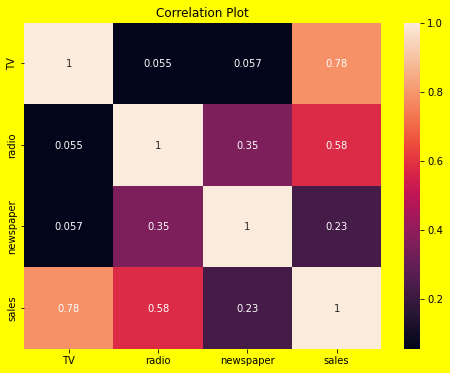

In [10]:
plt.figure(figsize=(8,6),facecolor='Yellow')
sns.heatmap(df1.corr(),annot=True)
plt.title('Correlation Plot')

In [11]:
corr_mat=df1.corr()
corr_mat['sales'].sort_values(ascending=True)

newspaper    0.228299
radio        0.576223
TV           0.782224
sales        1.000000
Name: sales, dtype: float64

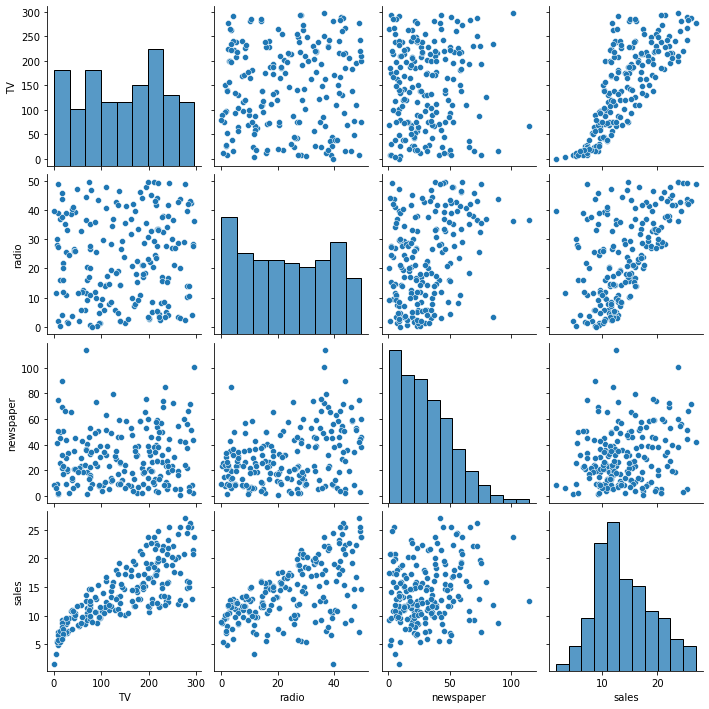

In [12]:
sns.pairplot(df1)

# Data visualisation

<AxesSubplot:xlabel='sales', ylabel='TV'>

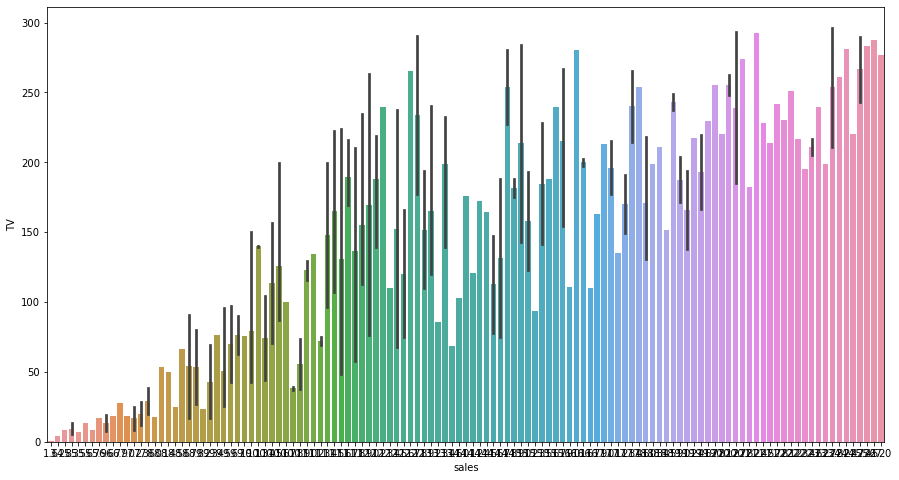

In [13]:
plt.figure(figsize=(15,8))
sns.barplot(x='sales',y='TV',data=df1)

# Plotting data distribution plot

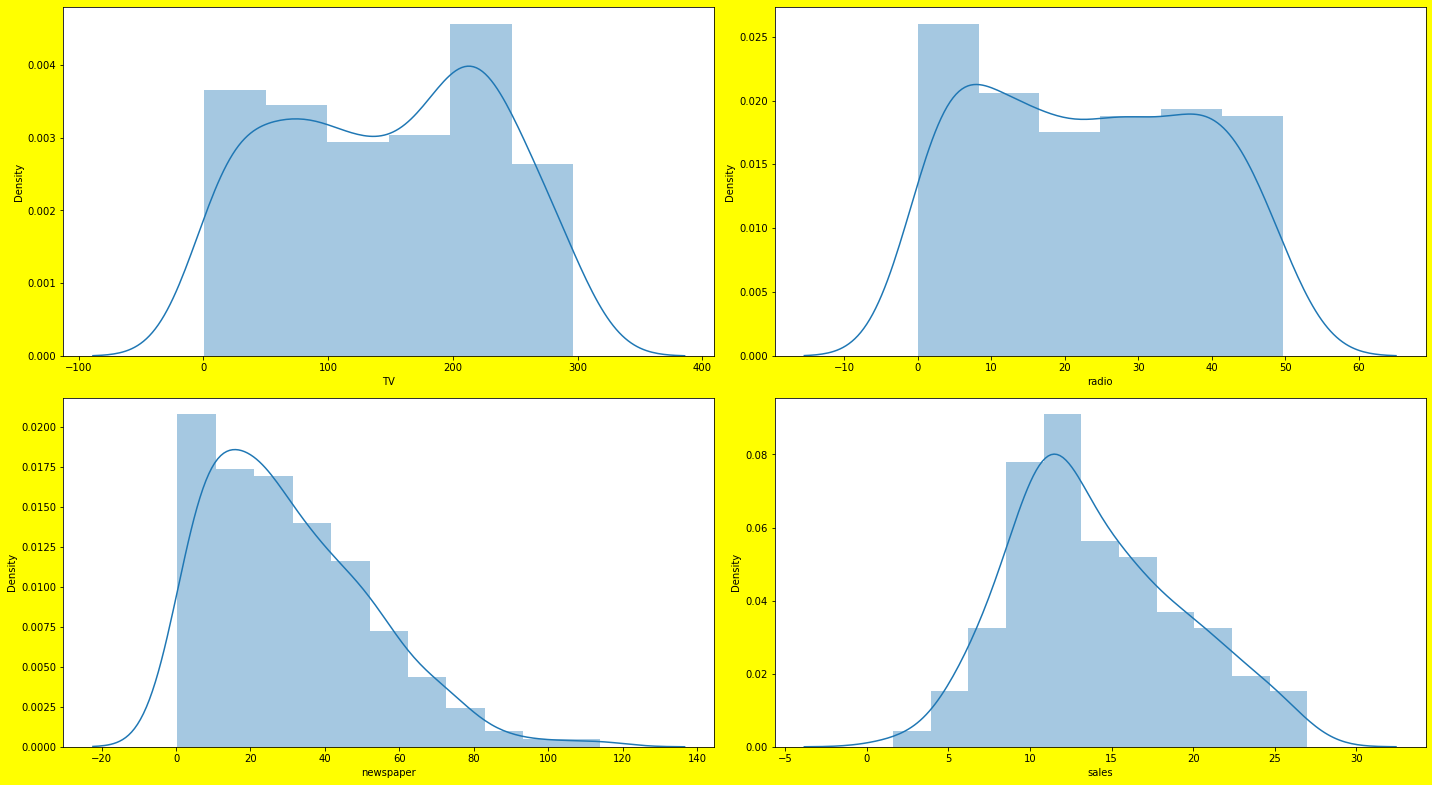

In [14]:
plt.figure(figsize=(20,16),facecolor='Yellow')
plotnumber=1

for column in df1:
    if plotnumber<=8:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=10)
        
        plotnumber+=1
        plt.tight_layout()

In [15]:
df1.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

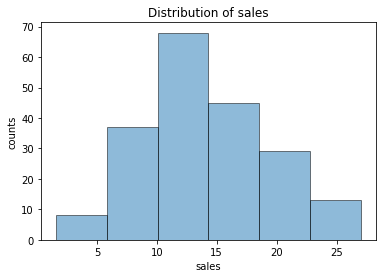

In [16]:
plt.hist(df1.sales,bins=6,alpha=0.5,histtype='bar',ec='black')
plt.title('Distribution of sales')
plt.xlabel('sales')
plt.ylabel('counts')
plt.show()

In [17]:
y=df1.iloc[: ,-1]
x=df1.iloc[: ,0:3]
col=df1.iloc[: ,0:2]

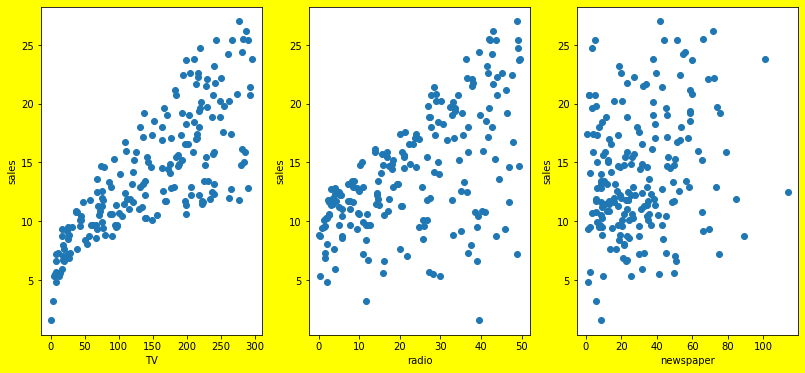

In [18]:
#visualiing relationship
plt.figure(figsize=(15,10),facecolor='yellow')
plotnumber=1

for column in x:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('sales',fontsize=10)
        
    plotnumber+=1
    plt.tight_layout()

# Removing skewness

In [19]:

x_new=np.sqrt(df1['newspaper'])
x_new.sort_values(ascending=True)

33      0.547723
65      0.948683
8       1.000000
139     1.303840
42      1.341641
         ...    
118     8.899438
165     9.208692
75      9.455157
101    10.044899
16     10.677078
Name: newspaper, Length: 200, dtype: float64

In [20]:
pd.DataFrame(x_new).skew().sort_values(ascending=True)

newspaper    0.062388
dtype: float64

In [21]:
df_new=pd.concat([col,x_new],axis=1)
df_new

,TV,radio,newspaper
0,230.1,37.8,8.318654
1,44.5,39.3,6.715653
2,17.2,45.9,8.324662
3,151.5,41.3,7.648529
4,180.8,10.8,7.641989
...,...,...,...
195,38.2,3.7,3.714835
196,94.2,4.9,2.846050
197,177.0,9.3,2.529822
198,283.6,42.0,8.136338


In [22]:
df_new.skew()

TV          -0.069853
radio        0.094175
newspaper    0.062388
dtype: float64

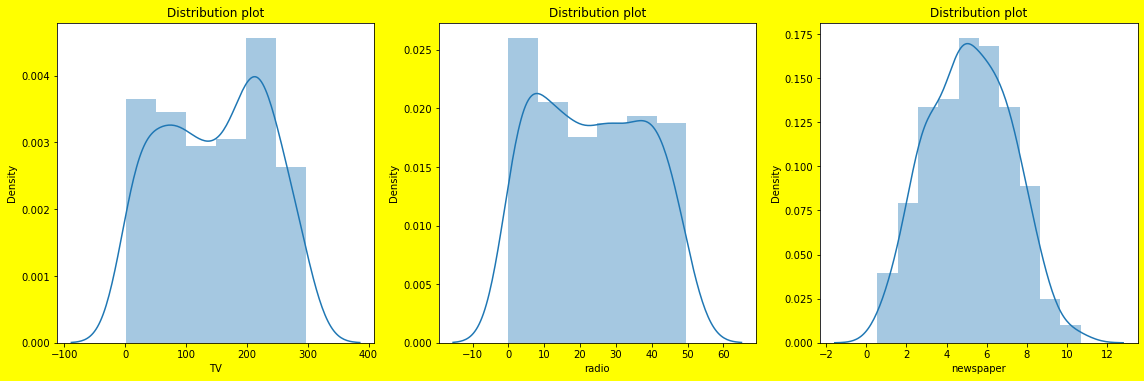

In [23]:
plt.figure(figsize=(16,10),facecolor='Yellow')
plotnumber=1

for column in df_new:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=10)
        plt.title('Distribution plot')
        
        plotnumber+=1
        plt.tight_layout()

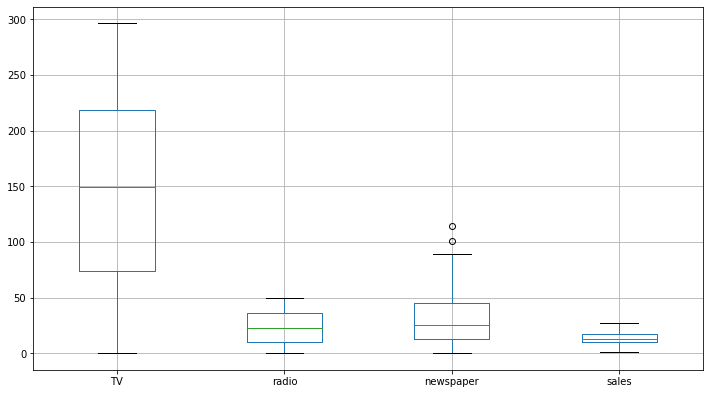

In [24]:
df1.boxplot(figsize=(12,8))
plt.subplots_adjust(bottom=0.25)
plt.show()


In [25]:
(np.abs(zscore(df1))<3).all()

TV            True
radio         True
newspaper    False
sales         True
dtype: bool

In [26]:
scores=np.abs(zscore(df1))
t=3
np.where(scores<3)
              

(array([  0,   0,   0,   0,   1,   1,   1,   1,   2,   2,   2,   2,   3,
          3,   3,   3,   4,   4,   4,   4,   5,   5,   5,   5,   6,   6,
          6,   6,   7,   7,   7,   7,   8,   8,   8,   8,   9,   9,   9,
          9,  10,  10,  10,  10,  11,  11,  11,  11,  12,  12,  12,  12,
         13,  13,  13,  13,  14,  14,  14,  14,  15,  15,  15,  15,  16,
         16,  16,  17,  17,  17,  17,  18,  18,  18,  18,  19,  19,  19,
         19,  20,  20,  20,  20,  21,  21,  21,  21,  22,  22,  22,  22,
         23,  23,  23,  23,  24,  24,  24,  24,  25,  25,  25,  25,  26,
         26,  26,  26,  27,  27,  27,  27,  28,  28,  28,  28,  29,  29,
         29,  29,  30,  30,  30,  30,  31,  31,  31,  31,  32,  32,  32,
         32,  33,  33,  33,  33,  34,  34,  34,  34,  35,  35,  35,  35,
         36,  36,  36,  36,  37,  37,  37,  37,  38,  38,  38,  38,  39,
         39,  39,  39,  40,  40,  40,  40,  41,  41,  41,  41,  42,  42,
         42,  42,  43,  43,  43,  43,  44,  44,  44

In [27]:
df_out=df1[(scores<3).all(axis=1)]
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         198 non-null    float64
 1   radio      198 non-null    float64
 2   newspaper  198 non-null    float64
 3   sales      198 non-null    float64
dtypes: float64(4)
memory usage: 7.7 KB


In [28]:
df_out.reset_index()

,index,TV,radio,newspaper,sales
0,0,230.1,37.8,69.2,22.1
1,1,44.5,39.3,45.1,10.4
2,2,17.2,45.9,69.3,9.3
3,3,151.5,41.3,58.5,18.5
4,4,180.8,10.8,58.4,12.9
...,...,...,...,...,...
193,195,38.2,3.7,13.8,7.6
194,196,94.2,4.9,8.1,9.7
195,197,177.0,9.3,6.4,12.8
196,198,283.6,42.0,66.2,25.5


In [29]:
df_out.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [30]:
new_df=df_out.iloc[: ,:-1]
y=df_out.iloc[: ,-1]


# Scaling Data

In [31]:
std=StandardScaler()
std_scaled=std.fit_transform(new_df)
x_scaled=pd.DataFrame(std_scaled,columns=new_df.columns)
x_scaled

,TV,radio,newspaper
0,0.978697,0.989521,1.932998
1,-1.199012,1.090705,0.751313
2,-1.519332,1.535913,1.937901
3,0.056456,1.225616,1.408349
4,0.400243,-0.831784,1.403446
...,...,...,...
193,-1.272932,-1.310720,-0.783407
194,-0.615864,-1.229773,-1.062892
195,0.355657,-0.932968,-1.146248
196,1.606431,1.272836,1.785900


<AxesSubplot:>

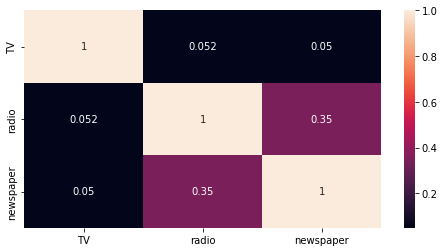

In [32]:
plt.figure(figsize=(8,4))
sns.heatmap(x_scaled.corr(),annot=True)

# Finding Best Random State

In [33]:

for i in range(150):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    
    score=lr.score(x_test,pred_test)
    
    
    print("At random state ",i,"the training accuracy is:- ",r2_score(y_train,pred_train))
    print("At random state ",i,"the testing accuracy is:-",r2_score(y_test,pred_test))
    print("\n")
    
    

At random state  0 the training accuracy is:-  0.8810539797064412
At random state  0 the testing accuracy is:- 0.9169198405610239


At random state  1 the training accuracy is:-  0.8914052092368193
At random state  1 the testing accuracy is:- 0.901590819258015


At random state  2 the training accuracy is:-  0.914062166521022
At random state  2 the testing accuracy is:- 0.8428698015955045


At random state  3 the training accuracy is:-  0.885841774992629
At random state  3 the testing accuracy is:- 0.9149570033494691


At random state  4 the training accuracy is:-  0.9005093374961071
At random state  4 the testing accuracy is:- 0.8621726482172966


At random state  5 the training accuracy is:-  0.9002368728891074
At random state  5 the testing accuracy is:- 0.8657156665982401


At random state  6 the training accuracy is:-  0.8940891865124617
At random state  6 the testing accuracy is:- 0.8929377262182756


At random state  7 the training accuracy is:-  0.8913212594482884
At random sta

In [34]:
max_score=0
randomstate=0
if score>max_score:
    max_score = score
    randomstate  = i
print( 'Best Random State=',randomstate,' and Score of LR MODEL : ',max_score*100)

Best Random State= 149  and Score of LR MODEL :  100.0


# Module Building

# LinearRegressor()

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=149)
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
r2=r2_score(y_test,pred)
r2

0.8125267452947138

# Cross Validation score

In [36]:
from sklearn.model_selection import cross_val_score

Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

for j in range(2,10):
    cv_score=cross_val_score(lr,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print("At cross fold ",j, "cv score is ",cv_mean)
    print("and accuracy score for training",Train_accuracy,"and accuracy for the testing is ",Test_accuracy)
    print("\n")

At cross fold  2 cv score is  0.8886177292201751
and accuracy score for training 0.9191162832652089 and accuracy for the testing is  0.8125267452947138


At cross fold  3 cv score is  0.8890406332045909
and accuracy score for training 0.9191162832652089 and accuracy for the testing is  0.8125267452947138


At cross fold  4 cv score is  0.8880501918930908
and accuracy score for training 0.9191162832652089 and accuracy for the testing is  0.8125267452947138


At cross fold  5 cv score is  0.8853605756683912
and accuracy score for training 0.9191162832652089 and accuracy for the testing is  0.8125267452947138


At cross fold  6 cv score is  0.8868174285063072
and accuracy score for training 0.9191162832652089 and accuracy for the testing is  0.8125267452947138


At cross fold  7 cv score is  0.883828289486476
and accuracy score for training 0.9191162832652089 and accuracy for the testing is  0.8125267452947138


At cross fold  8 cv score is  0.8880334554150218
and accuracy score for train

# Plotting fitline between predicted and actual charges

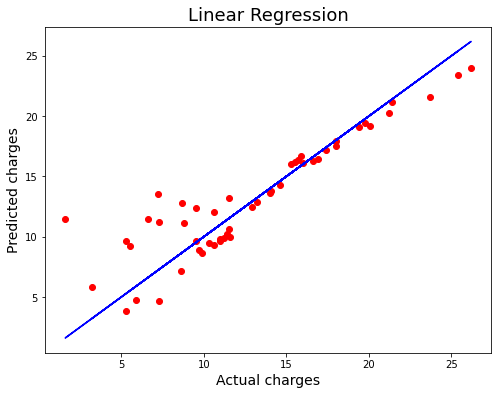

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Hyperparameter tuning

In [38]:
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


# Lasso Regression

In [39]:
ls=Lasso(alpha=0.1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.8090524046169587

# Cross Validation score

In [40]:
cv_score=cross_val_score(ls,x_scaled,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8870590310349005

# RandomForestRegressor()

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters= {'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [42]:
rf=RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rf_score=cross_val_score(rf,x_scaled,y,cv=5)
rfc=rf_score.mean()
print('Cross Val score: ',rfc*100)

R2 Score: 94.98034571808104
Cross Val score:  97.65728886875931


# We are getting a best accuracy score of 95% and cross validation score 97.7%,which shows our model is performing extremely well.

# Saving Module

In [43]:
import pickle
filename='Sales.pkl'
pickle.dump(rf,open(filename,'wb'))